In [ ]:
#import sys
#print(sys.executable)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib inline

#Modelling
from flask import Flask
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, max_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor


## Import  CSV Data as DataFrame

In [31]:
df = pd.read_csv("data/StudentsPerformance.csv")

## Show Top 5 Records

In [32]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Preparing X and Y Variables

In [33]:
X = df.drop(columns= ["math score"], axis = 1)

In [34]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [35]:
y = df["math score"]

In [36]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

In [37]:
## Create column Transformer with 3 Types of Transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("oneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer,num_features),
    ]
)

In [38]:
X = preprocessor.fit_transform(X)

In [39]:
X.shape

(1000, 19)

In [40]:
## separate dataset into train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

## Create an Evaluate Function to give all metrics after model Training

In [41]:
def evaluate_model(true, predicted):
    mae = mean_squared_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2square = r2_score(true,predicted)
    return mae, rmse, r2square

In [44]:
models = {
    "Linear Regressor": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbours Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegression": XGBRegressor(),
    "Cat Boost Regressor": CatBoostRegressor(verbose=False),
    "Ada Boost Regressor": AdaBoostRegressor()

}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) #Train model

    #Make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)


    # Evaluate Train and Test Dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model Performance for Training Set")
    print("- Root Mean Square error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    r2_list.append(model_train_r2)

    print("--------------------------------------------------")

    print("Model Performance for Test Set")
    print("- Root Mean Square error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print("="*35)
    print("\n")



Linear Regressor
Model Performance for Training Set
- Root Mean Square error: 5.3246
- Mean Absolute error: 28.3509
- R2 Score: 0.8742
--------------------------------------------------
Model Performance for Test Set
- Root Mean Square error: 5.3769
- Mean Absolute error: 28.9109
- R2 Score: 0.8812


Lasso
Model Performance for Training Set
- Root Mean Square error: 6.5938
- Mean Absolute error: 43.4784
- R2 Score: 0.8071
--------------------------------------------------
Model Performance for Test Set
- Root Mean Square error: 6.5197
- Mean Absolute error: 42.5064
- R2 Score: 0.8253


Ridge
Model Performance for Training Set
- Root Mean Square error: 5.3233
- Mean Absolute error: 28.3378
- R2 Score: 0.8743
--------------------------------------------------
Model Performance for Test Set
- Root Mean Square error: 5.3904
- Mean Absolute error: 29.0563
- R2 Score: 0.8806


K-Neighbours Regressor
Model Performance for Training Set
- Root Mean Square error: 5.7082
- Mean Absolute error: 32

## Results

In [45]:
pd.DataFrame(list(zip(model_list, r2_list)), columns = ["Model Name", "R2_Score"]).sort_values(by=["R2_Score"], ascending=False)

,Model Name,R2_Score
8,Ada Boost Regressor,0.999653
1,Lasso,0.881191
5,Random Forest Regressor,0.880593
4,Decision Tree Regressor,0.874304
0,Linear Regressor,0.874246
6,XGBRegression,0.855470
3,K-Neighbours Regressor,0.825320
2,Ridge,0.807146
7,Cat Boost Regressor,0.783586


## Linear Regression

In [46]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 88.12


## Plot y_pred and y_test

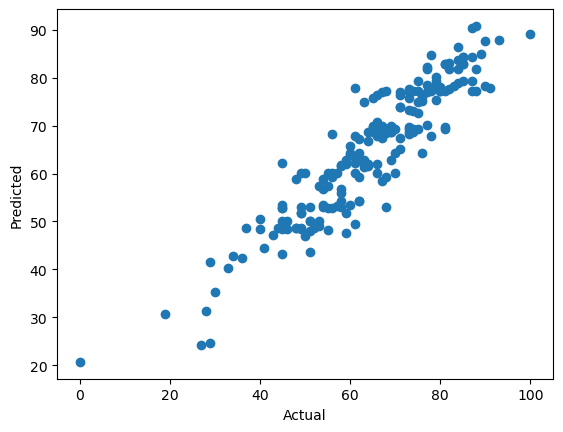

In [53]:
plt.scatter(y_test, y_pred);
plt.xlabel("Actual");
plt.ylabel("Predicted");

<Axes: xlabel='math score'>

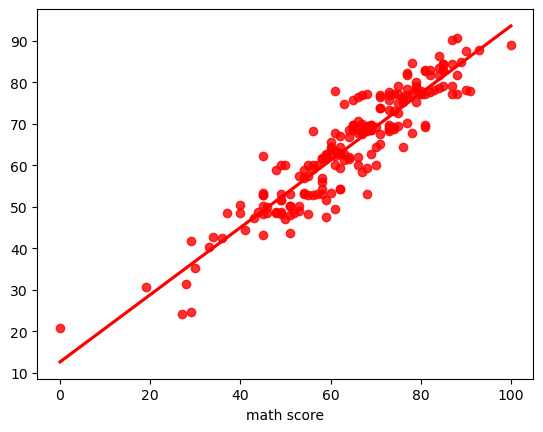

In [54]:
sns.regplot(x=y_test, y=y_pred, ci=None, color="Red")

## Difference Between Actual and Predicted Values

In [58]:
pred_df = pd.DataFrame({"Actual Value":y_test, "Predicted Value": y_pred, "Difference":y_test - y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,77.922222,13.077778
737,53,57.465608,-4.465608
740,80,77.391509,2.608491
660,74,77.223022,-3.223022
411,84,83.567010,0.432990
...,...,...,...
408,52,48.598174,3.401826
332,62,59.375723,2.624277
208,74,68.661538,5.338462
613,65,68.566372,-3.566372
